

# W281 Final Project
## 1. Data Preprocessing

In [2]:
import pandas as pd

# Load dataset
prefix_label = "Military_and_Civilian_Vehicles_Classification/Labels/CSV_Format/"
df = pd.read_csv(prefix_label+"train_labels.csv")

# Display multi-label dataset
df

filename  width  height  \
0                  000_14M0LD-e1525732547750-400x250.jpg    400     250   
1                  000_14M0LD-e1525732547750-400x250.jpg    400     250   
2                               000_1H95VB.width-800.jpg    800     532   
3                 000_1LC27X-e1570900274807-1024x640.jpg   1024     640   
4                 000_1LC27X-e1570900274807-1024x640.jpg   1024     640   
...                                                  ...    ...     ...   
10713              _110072566_gettyimages-1134568783.jpg    410     230   
10714                                _57608873_drone.jpg   1024     576   
10715  _83539969_b47a9225-6db2-4f83-975d-576edf0279e6...    660     371   
10716  _90482169_a1648047-7a18-441a-923c-c44260e5b19e...    410     230   
10717                    _98332434_mediaitem98332433.jpg    660     371   

                     class  xmin  ymin  xmax  ymax  
0            military tank   121    60   220   144  
1            military tank   198   108   371   197  
2        military aircraft    30   168   622   505  
3            military tank    78    92   858   563  
4           military truck   816   288  1012   554  
...                    ...   ...   ...   ...   ...  
10713    military aircraft    29     5   368   151  
10714  military helicopter   182   119   855   403  
10715    military aircraft    39    41   589   302  
10716    military aircraft    83    36   326   149  
10717  military helicopter   175     9   442   115  

[10718 rows x 8 columns]

### 1.1. Remove Multi-label

In [3]:
# Calculate bounding box area
df["area"] = (df["xmax"] - df["xmin"]) * (df["ymax"] - df["ymin"])

# Keep only the row with the largest bounding box for each image
df_cleaned = df.loc[df.groupby("filename")["area"].idxmax()].drop(columns=["area"])

# Save cleaned dataset
df_cleaned.to_csv("train_labels_cleaned.csv", index=False)

# Display single-label dataset
df_cleaned


filename  width  height  \
1                  000_14M0LD-e1525732547750-400x250.jpg    400     250   
2                               000_1H95VB.width-800.jpg    800     532   
3                 000_1LC27X-e1570900274807-1024x640.jpg   1024     640   
5                             0023ae82ca0f1487c33a46.jpg    900     618   
6      01-BOAC-Comet-1-G-BOAC-AI-PM-1953-0603-Marvin-...   1626    1038   
...                                                  ...    ...     ...   
10678                 yemen-krQF--621x414LiveMintJPG.jpg    621     414   
10680                           yfpj25etn5clno4v0euw.jpg    795     498   
10695                           z1-tank-firing-600-2.jpg    600     410   
10696                 zimbabwe-story-xl_111517074456.jpg    647     404   
10701                              zunum_aero_za10_1.jpg    800     600   

                   class  xmin  ymin  xmax  ymax  
1          military tank   198   108   371   197  
2      military aircraft    30   168   622   505  
3          military tank    78    92   858   563  
5      civilian aircraft     5    62   857   590  
6      civilian aircraft   115   375  1593   784  
...                  ...   ...   ...   ...   ...  
10678     military truck    16   261   564   404  
10680      military tank     6   178   414   461  
10695      military tank    48   151   444   353  
10696      military tank   137   137   541   352  
10701  civilian aircraft   156   239   624   437  

[6705 rows x 8 columns]

In [4]:
# Get class distribution
class_counts = df_cleaned["class"].value_counts()

# Get width and height range
width_range = (df_cleaned["width"].min(), df_cleaned["width"].max())
height_range = (df_cleaned["height"].min(), df_cleaned["height"].max())

# Display results
print("Class Distribution:\n", class_counts)
print("\nWidth Range:", width_range)
print("Height Range:", height_range)

Class Distribution:
 class
military tank          1615
military helicopter    1172
civilian car           1024
military aircraft       970
military truck          963
civilian aircraft       961
Name: count, dtype: int64

Width Range: (84, 7800)
Height Range: (100, 7472)


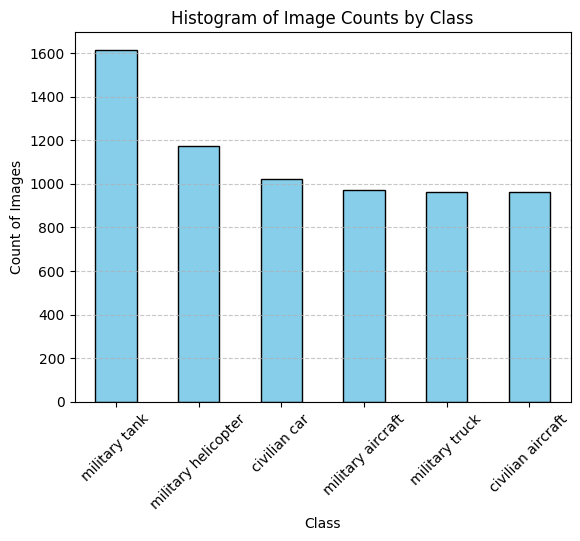

In [5]:
# histogram of image count by class

import pandas as pd
import matplotlib.pyplot as plt

# Plot histogram
class_counts = df_cleaned['class'].value_counts()
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel('Class')
plt.ylabel('Count of Images')
plt.title('Histogram of Image Counts by Class')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

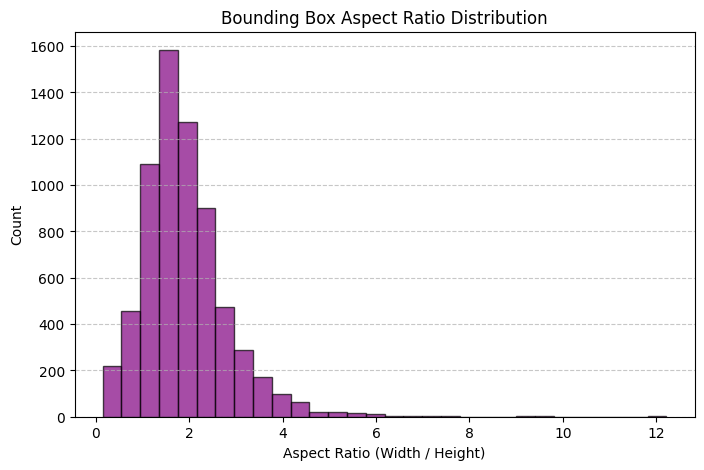

In [6]:
# Bounding Box Aspect Ration Distribution:
# Understand how objects' shapes vary

# Compute aspect ratio
df_cleaned["aspect_ratio"] = (df_cleaned["xmax"] - df_cleaned["xmin"]) / (df_cleaned["ymax"] - df_cleaned["ymin"])

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned["aspect_ratio"], bins=30, color='purple', alpha=0.7, edgecolor='black')

plt.xlabel('Aspect Ratio (Width / Height)')
plt.ylabel('Count')
plt.title('Bounding Box Aspect Ratio Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

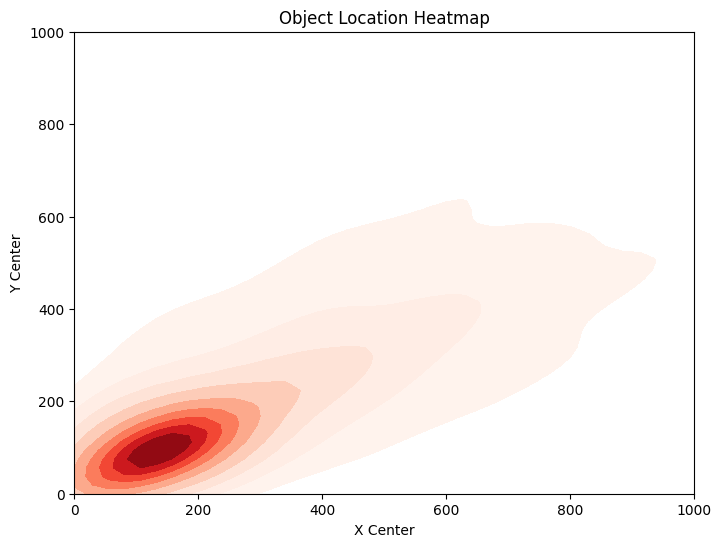

In [7]:
# Object Size Heatmap (where objects most commonly appear in images)
import seaborn as sns
import matplotlib.pyplot as plt

# Compute bounding box centers
df["x_center"] = (df["xmin"] + df["xmax"]) / 2
df["y_center"] = (df["ymin"] + df["ymax"]) / 2

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df["x_center"], y=df["y_center"], cmap="Reds", fill=True, thresh=0.1)

# Limit the axes range
plt.xlim(0, 1000)  # Set x-axis range
plt.ylim(0, 1000)  # Set y-axis range

plt.xlabel('X Center')
plt.ylabel('Y Center')
plt.title('Object Location Heatmap')

plt.show()

In [ ]:
import pandas as pd
import os

# Paths
train_csv_path = "Military_and_Civilian_Vehicles_Classification/Labels/CSV_Format/train_labels.csv"
test_csv_path = "Military_and_Civilian_Vehicles_Classification/Labels/CSV_Format/test_labels.csv"

# Load original CSVs
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

def clean_labels(df):
    # Compute area of bounding box
    df["area"] = (df["xmax"] - df["xmin"]) * (df["ymax"] - df["ymin"])
    
    # Keep only the row with the largest bounding box for each image
    df_cleaned = df.loc[df.groupby("filename")["area"].idxmax()].copy()
    
    # Drop the area column
    df_cleaned.drop(columns=["area"], inplace=True)
    
    # Reset index
    df_cleaned.reset_index(drop=True, inplace=True)
    
    return df_cleaned

# Clean both train and test sets
train_cleaned = clean_labels(train_df)
test_cleaned = clean_labels(test_df)

# Save to new CSV files
train_cleaned.to_csv("train_labels_cleaned.csv", index=False)
test_cleaned.to_csv("test_labels_cleaned.csv", index=False)

# Confirm results
print(f"Train set: {len(train_df)} original → {len(train_cleaned)} cleaned")
print(f"Test set: {len(test_df)} original → {len(test_cleaned)} cleaned")

## 2. Load Images + Feature Extraction (HOG + RGB Histogram)
We are extracting features from each image to train traditional classifiers. For each image in the cleaned dataset:
* Resize to 128×128
* Compute:
    * HOG features (for texture/shape)
    * Color histogram (RGB) – 32 bins per channel
* Store features and labels for use in classification models

In [10]:
import pandas as pd
import cv2
import numpy as np
from skimage.feature import hog
from tqdm import tqdm
import os

# Settings
IMAGE_DIR = "Military_and_Civilian_Vehicles_Classification/Images/"
IMAGE_SIZE = (128, 128)
HIST_BINS = 32

# Load label CSVs
train_df = pd.read_csv("train_labels_cleaned.csv")
test_df = pd.read_csv("test_labels_cleaned.csv")

# Helper: Compute HOG features
def extract_hog_features(img_gray):
    features, _ = hog(img_gray, visualize=True)
    return features

# Helper: Compute RGB histogram (flattened)
def extract_rgb_histogram(img_color):
    hist_features = []
    for i in range(3):  # B, G, R
        hist = cv2.calcHist([img_color], [i], None, [HIST_BINS], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        hist_features.extend(hist)
    return np.array(hist_features)

# Main feature extraction function
def process_dataset(df, set_name="train"):
    hog_list = []
    hist_list = []
    label_list = []
    filenames = []

    for _, row in tqdm(df.iterrows(), total=len(df), desc=f"Processing {set_name} set"):
        img_path = os.path.join(IMAGE_DIR, row["filename"])
        label = row["class"]
        
        img = cv2.imread(img_path)
        if img is None:
            continue

        img = cv2.resize(img, IMAGE_SIZE)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Extract features
        hog_feat = extract_hog_features(img_gray)
        hist_feat = extract_rgb_histogram(img)

        hog_list.append(hog_feat)
        hist_list.append(hist_feat)
        label_list.append(label)
        filenames.append(row["filename"])

    return {
        "hog": np.array(hog_list),
        "hist": np.array(hist_list),
        "labels": np.array(label_list),
        "filenames": np.array(filenames)
    }

# Extract features
train_features = process_dataset(train_df, "train")
test_features = process_dataset(test_df, "test")

# Save for reuse
np.savez("features_train_rgb.npz", **train_features)
np.savez("features_test_rgb.npz", **test_features)

print("✅ Feature extraction with RGB histograms completed.")


Processing test set: 100%|██████████| 496/496 [00:22<00:00, 22.39it/s]


✅ Feature extraction with RGB histograms completed.


## 3. Train and Evaluate Classifiers
### Models:
* Logistic Regression
* Support Vector Machine (SVM)

### Evaluation Metrics:
* Accuracy
* Precision, Recall, F1 Score
* Confusion Matrix
* ROC Curve (One-vs-Rest)

## 3.1. HOG Features:

✅ PCA applied: reduced from 15876 → 150 dimensions.


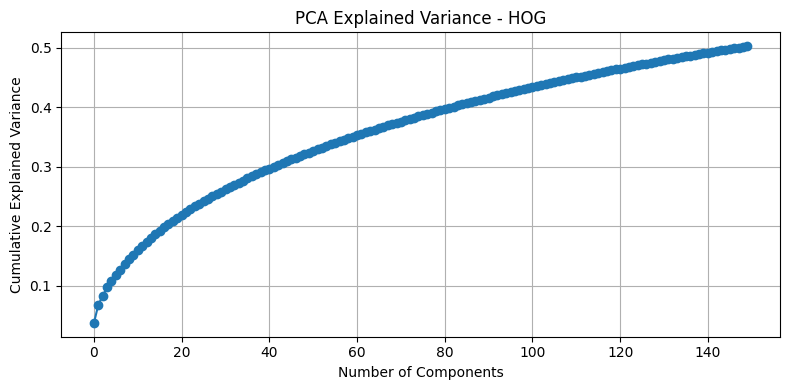

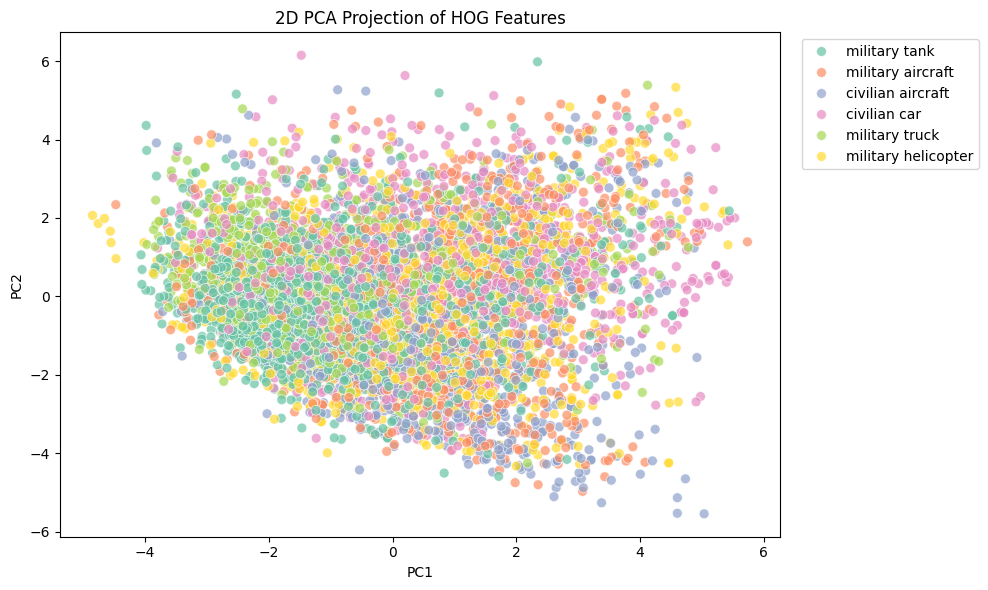

🚀 Running t-SNE on HOG features...


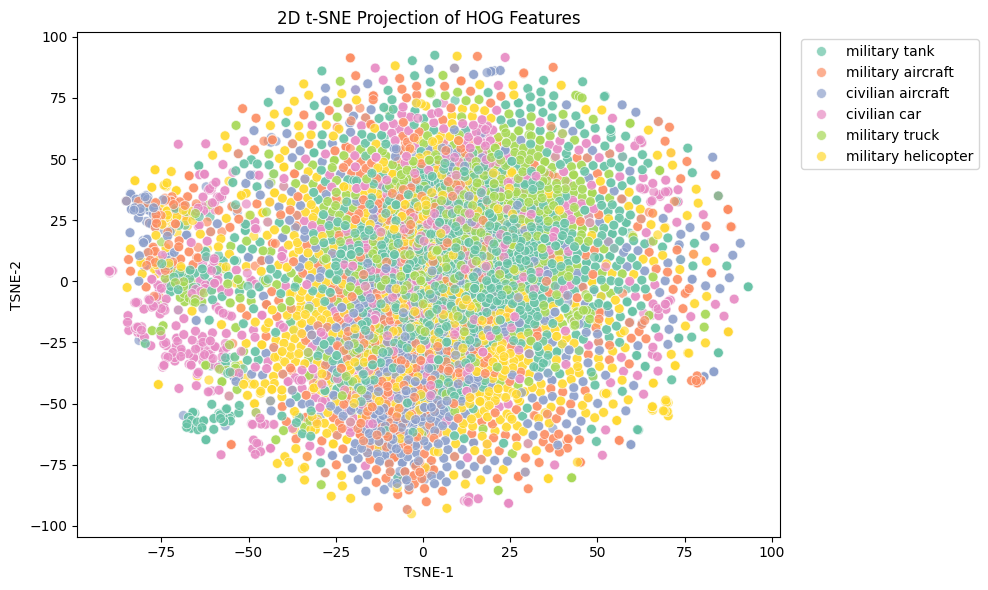


🚀 Training LogisticRegression...
✅ LogisticRegression training complete in 0.10 seconds.

📊 Evaluating LogisticRegression...
⏱️ Inference time: 0.00 seconds
✅ Accuracy: 0.5927

📋 Classification Report:
                     precision    recall  f1-score   support

  civilian aircraft       0.52      0.53      0.52        70
       civilian car       0.49      0.58      0.53        60
  military aircraft       0.54      0.54      0.54        70
military helicopter       0.72      0.58      0.64       108
      military tank       0.61      0.75      0.67       110
     military truck       0.64      0.50      0.56        78

           accuracy                           0.59       496
          macro avg       0.59      0.58      0.58       496
       weighted avg       0.60      0.59      0.59       496



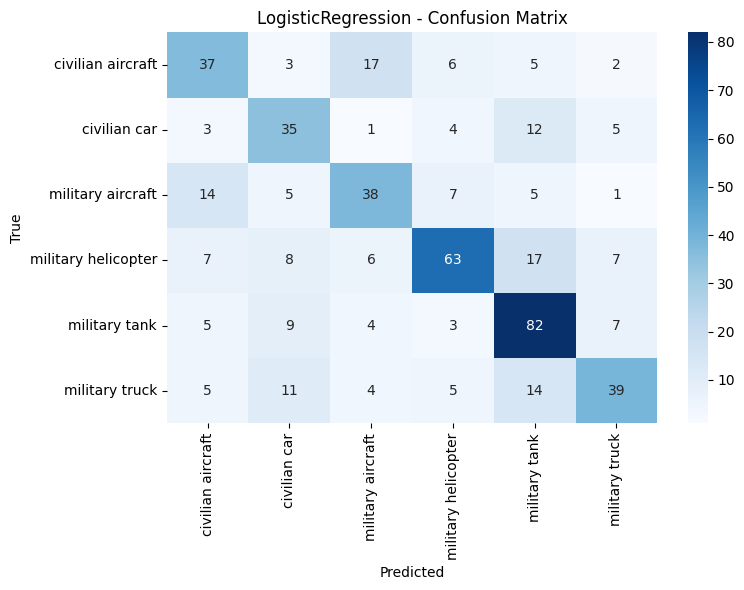

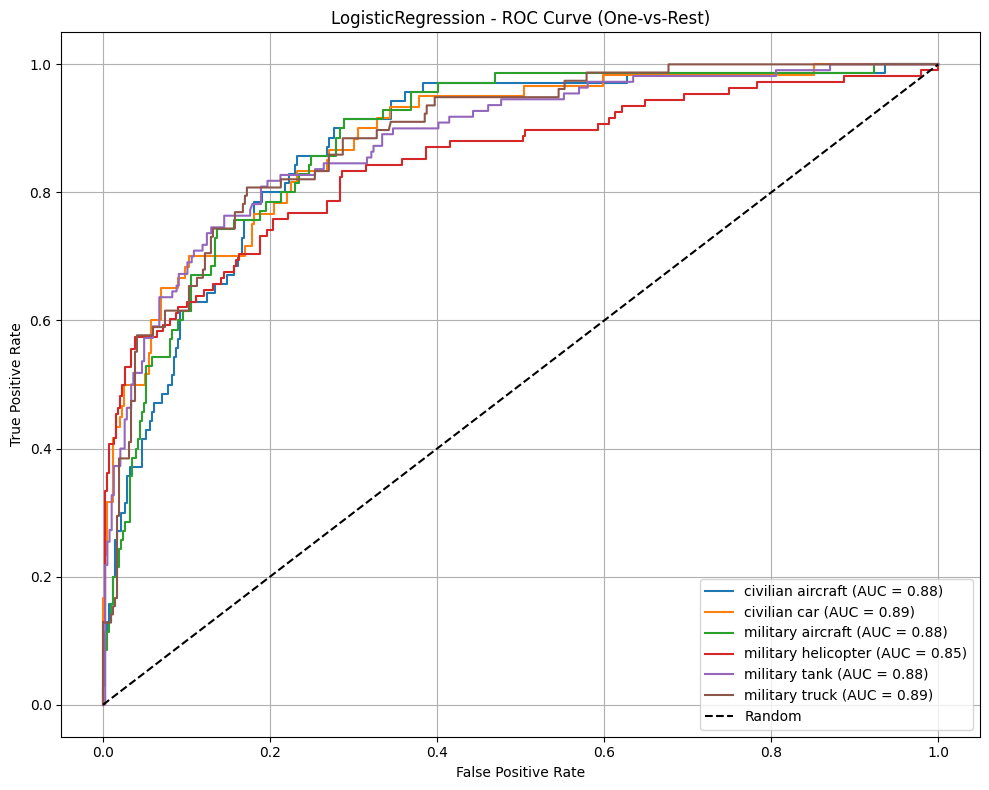

📁 Plots saved in: results/hog/

🚀 Training SVM...
✅ SVM training complete in 46.75 seconds.

📊 Evaluating SVM...
⏱️ Inference time: 0.14 seconds
✅ Accuracy: 0.6190

📋 Classification Report:
                     precision    recall  f1-score   support

  civilian aircraft       0.49      0.59      0.54        70
       civilian car       0.56      0.62      0.59        60
  military aircraft       0.57      0.60      0.58        70
military helicopter       0.74      0.62      0.67       108
      military tank       0.67      0.73      0.70       110
     military truck       0.65      0.51      0.57        78

           accuracy                           0.62       496
          macro avg       0.61      0.61      0.61       496
       weighted avg       0.63      0.62      0.62       496



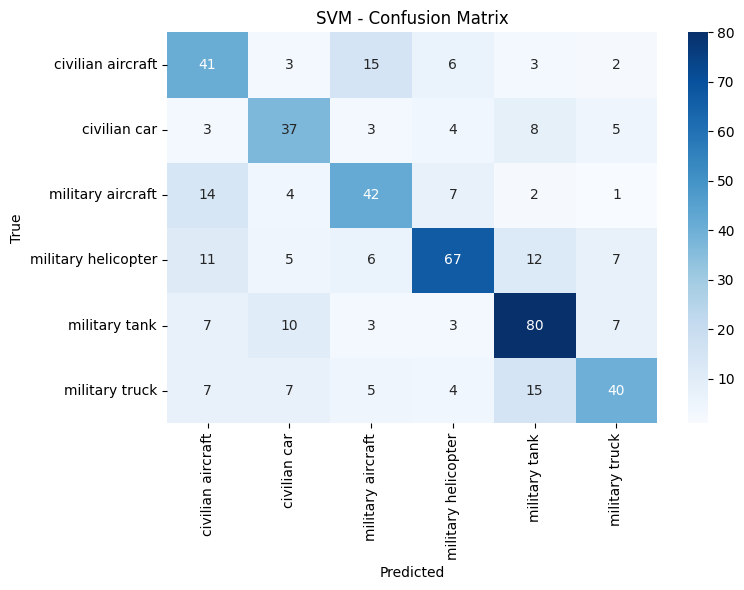

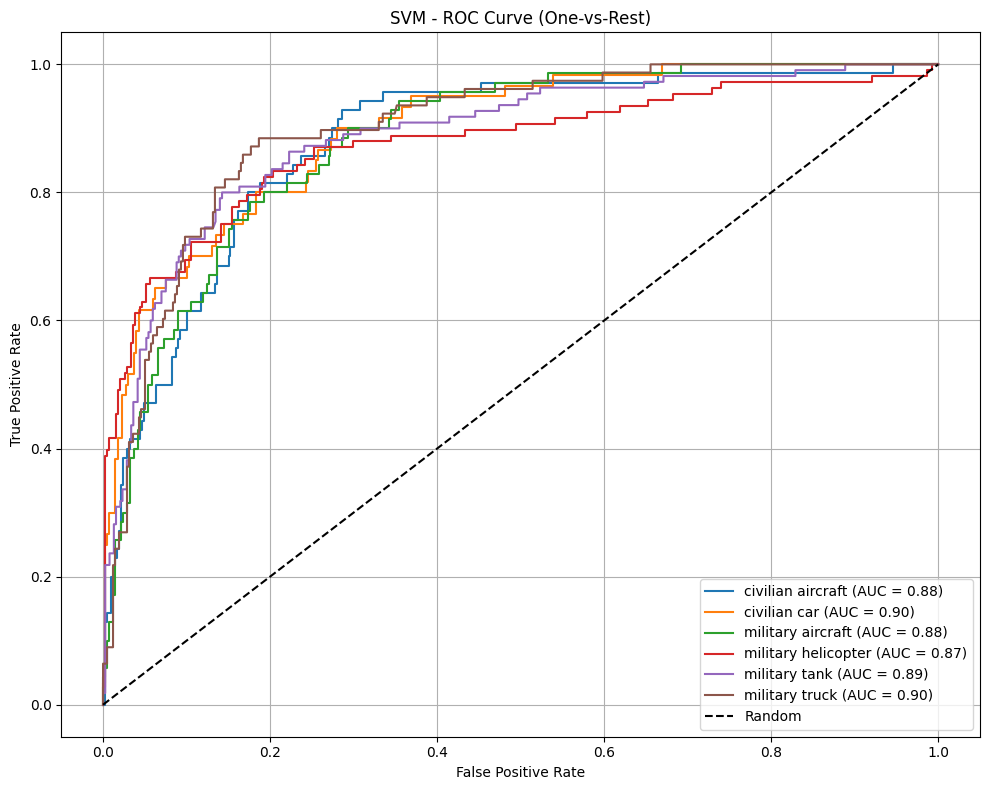

📁 Plots saved in: results/hog/
⏱️ Training Time Summary:
 - Logistic Regression: 0.10s train, 0.00s infer
 - SVM: 46.75s train, 0.14s infer


In [13]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from tqdm import tqdm
from sklearn.manifold import TSNE

# --- Config ---
FEATURE_SET = "hog"  # "hog" or "hist"
MODEL_OUTPUT_DIR = f"results/{FEATURE_SET}"
os.makedirs(MODEL_OUTPUT_DIR, exist_ok=True)

# --- Load features ---
train = np.load("features_train_rgb.npz", allow_pickle=True)
test = np.load("features_test_rgb.npz", allow_pickle=True)

X_train_raw = train[FEATURE_SET]
X_test_raw = test[FEATURE_SET]
y_train = train["labels"]
y_test = test["labels"]

# --- Encode labels ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
class_names = le.classes_

# ============ STEP 1: Apply PCA ============

# Reduce to 150 components
n_components = 150
pca_model = PCA(n_components=n_components)
X_train = pca_model.fit_transform(X_train_raw)
X_test = pca_model.transform(X_test_raw)

print(f"✅ PCA applied: reduced from {X_train_raw.shape[1]} → {X_train.shape[1]} dimensions.")

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title(f"PCA Explained Variance - {FEATURE_SET.upper()}")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{MODEL_OUTPUT_DIR}/pca_explained_variance_curve.png")
plt.show()

# 2D PCA visualization
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train_raw)

df_plot = pd.DataFrame({
    "PC1": X_train_2d[:, 0],
    "PC2": X_train_2d[:, 1],
    "Class": le.inverse_transform(y_train_enc)
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x="PC1", y="PC2", hue="Class", palette="Set2", alpha=0.7, s=50)
plt.title(f"2D PCA Projection of {FEATURE_SET.upper()} Features")
plt.legend(loc="best", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig(f"{MODEL_OUTPUT_DIR}/pca_2d_visualization.png")
plt.show()

# ============ STEP 1.5: t-SNE 2D Visualization ============

print(f"🚀 Running t-SNE on {FEATURE_SET.upper()} features...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca')
X_train_tsne = tsne.fit_transform(X_train_raw)

df_tsne = pd.DataFrame({
    "TSNE-1": X_train_tsne[:, 0],
    "TSNE-2": X_train_tsne[:, 1],
    "Class": le.inverse_transform(y_train_enc)
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x="TSNE-1", y="TSNE-2", hue="Class", palette="Set2", alpha=0.7, s=50)
plt.title(f"2D t-SNE Projection of {FEATURE_SET.upper()} Features")
plt.legend(loc="best", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig(f"{MODEL_OUTPUT_DIR}/tsne_2d_visualization.png")
plt.show()

# ============ STEP 2: Train and Evaluate ============

def train_model(model, model_name):
    print(f"\n🚀 Training {model_name}...")
    start_time = time.time()  # ⏱️ Start timer
    model.fit(X_train, y_train_enc)
    elapsed = time.time() - start_time  # ⏱️ End timer
    print(f"✅ {model_name} training complete in {elapsed:.2f} seconds.")
    return model, elapsed

def evaluate_model(model, model_name):
    print(f"\n📊 Evaluating {model_name}...")
    start_time = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_time
    print(f"⏱️ Inference time: {inference_time:.2f} seconds")
    
    y_score = model.predict_proba(X_test)

    acc = accuracy_score(y_test_enc, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print("\n📋 Classification Report:")
    print(classification_report(y_test_enc, y_pred, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_test_enc, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.savefig(f"{MODEL_OUTPUT_DIR}/{model_name}_confusion_matrix.png")
    plt.show()

    # ROC AUC
    y_test_bin = label_binarize(y_test_enc, classes=np.arange(len(class_names)))
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(len(class_names)):
        plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random")
    plt.title(f"{model_name} - ROC Curve (One-vs-Rest)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{MODEL_OUTPUT_DIR}/{model_name}_roc_curve.png")
    plt.show()

    print(f"📁 Plots saved in: {MODEL_OUTPUT_DIR}/")
    return inference_time

# --- Run Classifiers ---
logreg = LogisticRegression(max_iter=1000)
logreg, logreg_train_time = train_model(logreg, "LogisticRegression")
logreg_infer_time = evaluate_model(logreg, "LogisticRegression")

svm = SVC(kernel="linear", probability=True)
#svm = train_model(svm, "SVM")
svm, svm_train_time = train_model(svm, "SVM")
svm_infer_time = evaluate_model(svm, "SVM")

print(f"⏱️ Training Time Summary:")
print(f" - Logistic Regression: {logreg_train_time:.2f}s train, {logreg_infer_time:.2f}s infer")
print(f" - SVM: {svm_train_time:.2f}s train, {svm_infer_time:.2f}s infer")

## 3.2. RGB Histogram

✅ PCA applied: reduced from 96 → 50 dimensions.


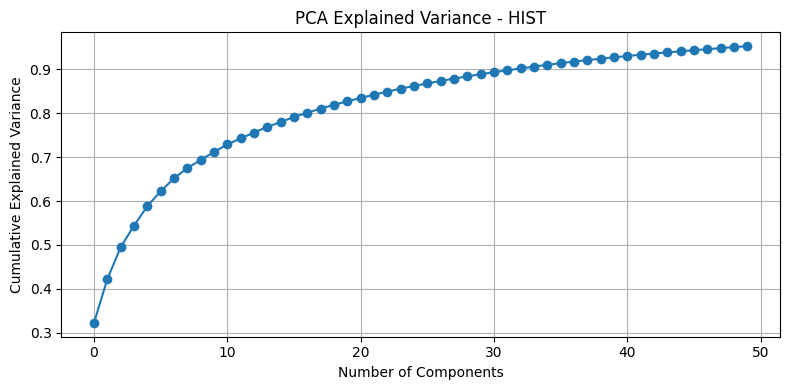

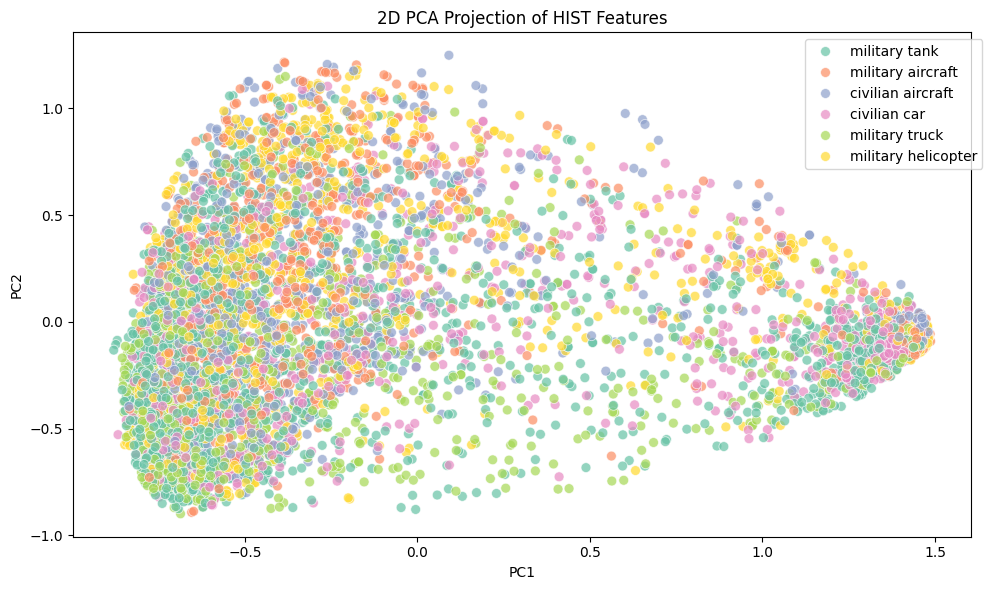

🚀 Running t-SNE on HIST features...


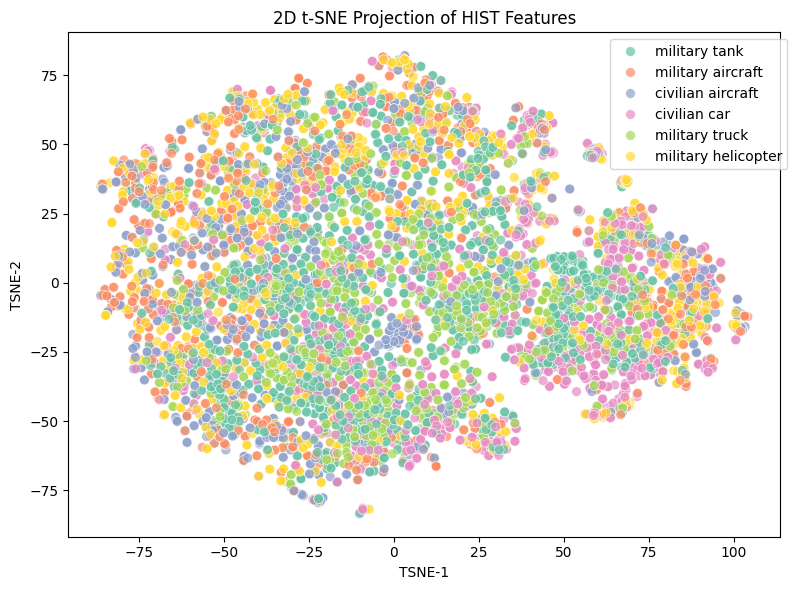


🚀 Training LogisticRegression...
✅ LogisticRegression training complete in 0.17 seconds.

📊 Evaluating LogisticRegression...
⏱️ Inference time: 0.00 seconds
✅ Accuracy: 0.3851

📋 Classification Report:
                     precision    recall  f1-score   support

  civilian aircraft       0.40      0.29      0.33        70
       civilian car       0.32      0.52      0.39        60
  military aircraft       0.37      0.29      0.32        70
military helicopter       0.42      0.37      0.39       108
      military tank       0.38      0.58      0.46       110
     military truck       0.55      0.21      0.30        78

           accuracy                           0.39       496
          macro avg       0.41      0.37      0.37       496
       weighted avg       0.41      0.39      0.37       496



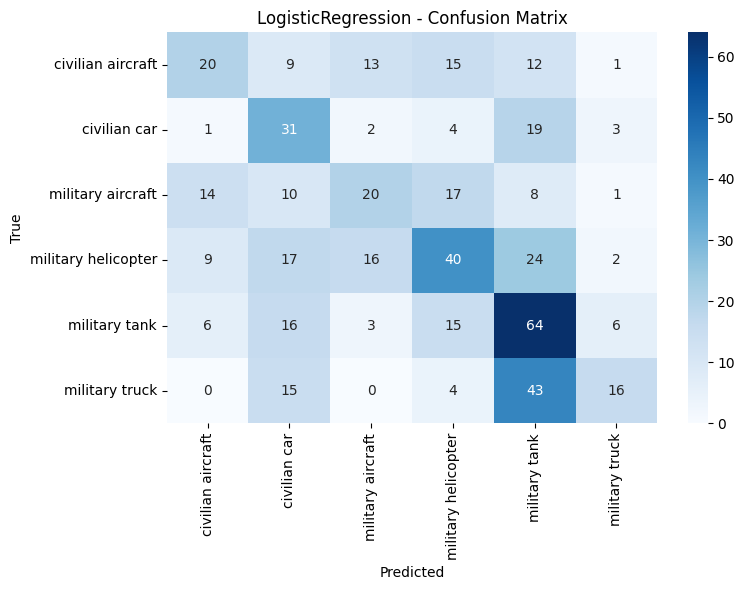

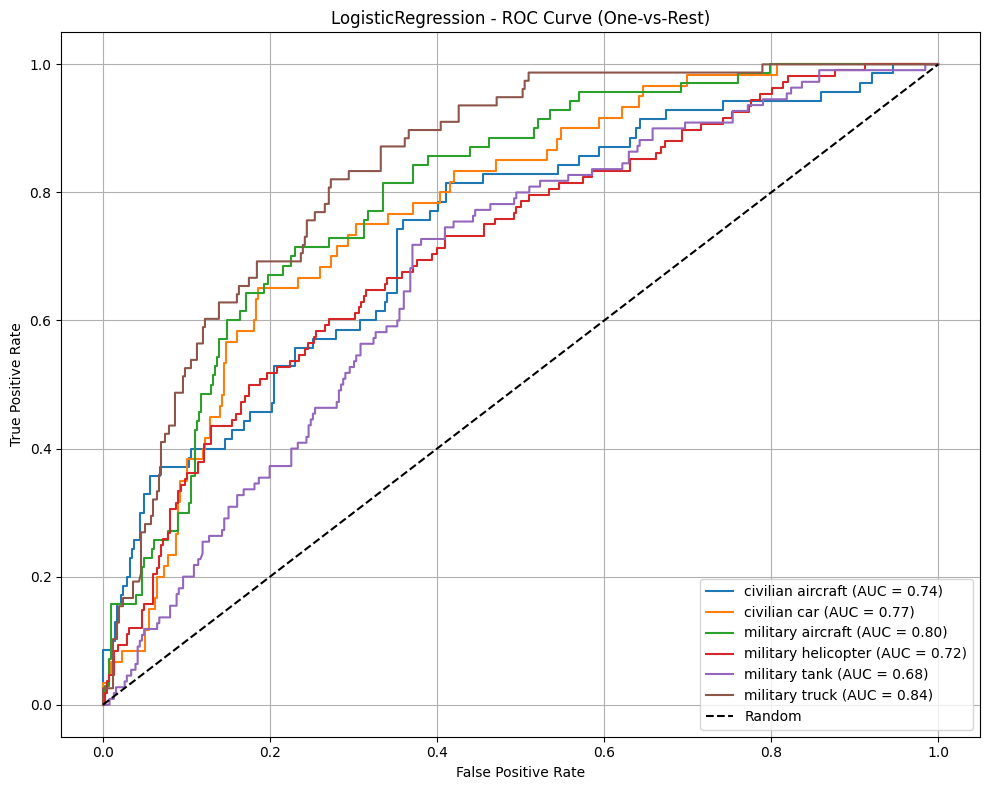

📁 Plots saved in: results/hist/

🚀 Training SVM...
✅ SVM training complete in 6.82 seconds.

📊 Evaluating SVM...
⏱️ Inference time: 0.08 seconds
✅ Accuracy: 0.3407

📋 Classification Report:
                     precision    recall  f1-score   support

  civilian aircraft       0.41      0.30      0.35        70
       civilian car       0.25      0.60      0.36        60
  military aircraft       0.44      0.26      0.32        70
military helicopter       0.44      0.38      0.41       108
      military tank       0.31      0.48      0.38       110
     military truck       0.00      0.00      0.00        78

           accuracy                           0.34       496
          macro avg       0.31      0.34      0.30       496
       weighted avg       0.32      0.34      0.31       496



/global/home/users/fengchenliu/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/global/home/users/fengchenliu/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/global/home/users/fengchenliu/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

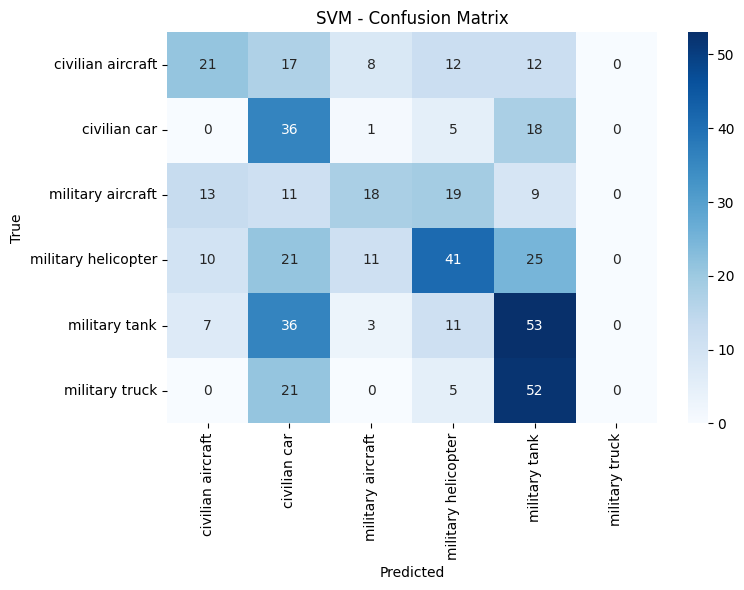

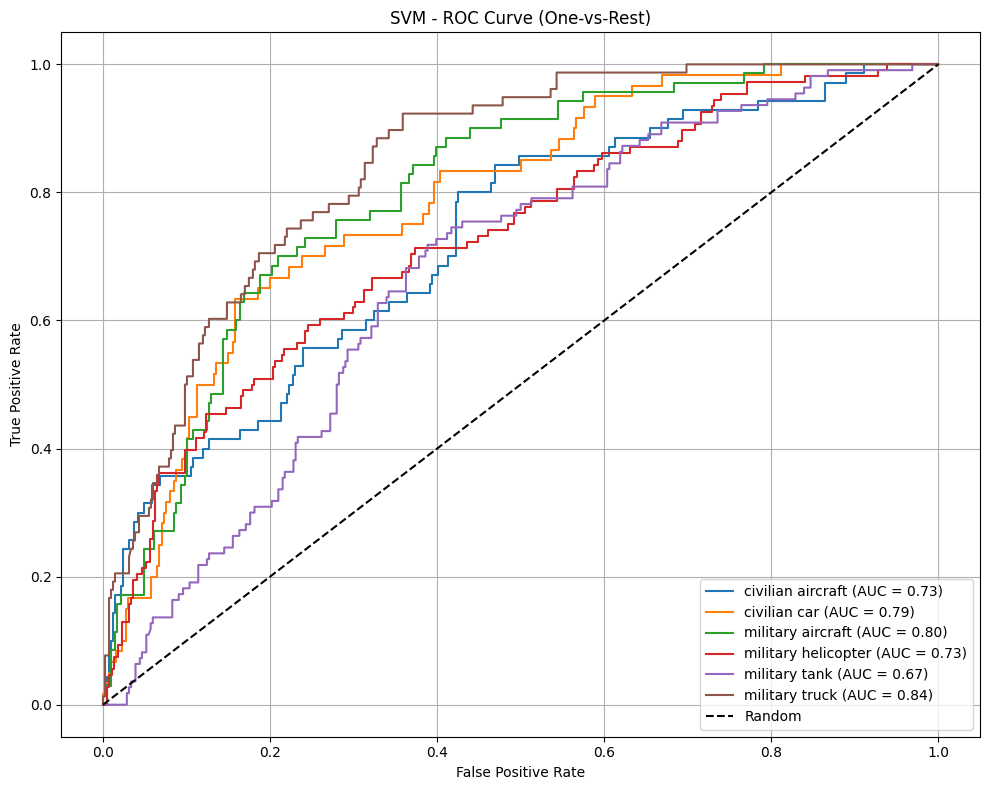

📁 Plots saved in: results/hist/

⏱️ Training & Inference Time Summary:
 - Logistic Regression: 0.17s train, 0.00s infer
 - SVM: 6.82s train, 0.08s infer


In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tqdm import tqdm

# --- Config ---
FEATURE_SET = "hist"
MODEL_OUTPUT_DIR = f"results/{FEATURE_SET}"
os.makedirs(MODEL_OUTPUT_DIR, exist_ok=True)

# --- Load features ---
train = np.load("features_train_rgb.npz", allow_pickle=True)
test = np.load("features_test_rgb.npz", allow_pickle=True)

X_train_raw = train[FEATURE_SET]
X_test_raw = test[FEATURE_SET]
y_train = train["labels"]
y_test = test["labels"]

# --- Encode labels ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
class_names = le.classes_

# ============ STEP 1: Apply PCA ============
n_components = min(50, X_train_raw.shape[1])
pca_model = PCA(n_components=n_components)
X_train = pca_model.fit_transform(X_train_raw)
X_test = pca_model.transform(X_test_raw)

print(f"✅ PCA applied: reduced from {X_train_raw.shape[1]} → {X_train.shape[1]} dimensions.")

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title(f"PCA Explained Variance - {FEATURE_SET.upper()}")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{MODEL_OUTPUT_DIR}/pca_explained_variance_curve.png")
plt.show()

# 2D PCA visualization
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train_raw)

df_plot = pd.DataFrame({
    "PC1": X_train_2d[:, 0],
    "PC2": X_train_2d[:, 1],
    "Class": le.inverse_transform(y_train_enc)
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x="PC1", y="PC2", hue="Class", palette="Set2", alpha=0.7, s=50)
plt.title(f"2D PCA Projection of {FEATURE_SET.upper()} Features")
plt.legend(loc="best", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig(f"{MODEL_OUTPUT_DIR}/pca_2d_visualization.png")
plt.show()

# ============ STEP 1.5: t-SNE ============
print(f"🚀 Running t-SNE on {FEATURE_SET.upper()} features...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca')
X_train_tsne = tsne.fit_transform(X_train_raw)

df_tsne = pd.DataFrame({
    "TSNE-1": X_train_tsne[:, 0],
    "TSNE-2": X_train_tsne[:, 1],
    "Class": le.inverse_transform(y_train_enc)
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x="TSNE-1", y="TSNE-2", hue="Class", palette="Set2", alpha=0.7, s=50)
plt.title(f"2D t-SNE Projection of {FEATURE_SET.upper()} Features")
plt.legend(loc="best", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig(f"{MODEL_OUTPUT_DIR}/tsne_2d_visualization.png")
plt.show()

# ============ STEP 2: Train and Evaluate ============
def train_model(model, model_name):
    print(f"\n🚀 Training {model_name}...")
    start_time = time.time()
    model.fit(X_train, y_train_enc)
    elapsed = time.time() - start_time
    print(f"✅ {model_name} training complete in {elapsed:.2f} seconds.")
    return model, elapsed

def evaluate_model(model, model_name):
    print(f"\n📊 Evaluating {model_name}...")
    start_time = time.time()
    y_pred = model.predict(X_test)
    infer_time = time.time() - start_time
    print(f"⏱️ Inference time: {infer_time:.2f} seconds")

    y_score = model.predict_proba(X_test)

    acc = accuracy_score(y_test_enc, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print("\n📋 Classification Report:")
    print(classification_report(y_test_enc, y_pred, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_test_enc, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.savefig(f"{MODEL_OUTPUT_DIR}/{model_name}_confusion_matrix.png")
    plt.show()

    # ROC AUC
    y_test_bin = label_binarize(y_test_enc, classes=np.arange(len(class_names)))
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(len(class_names)):
        plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random")
    plt.title(f"{model_name} - ROC Curve (One-vs-Rest)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{MODEL_OUTPUT_DIR}/{model_name}_roc_curve.png")
    plt.show()

    print(f"📁 Plots saved in: {MODEL_OUTPUT_DIR}/")
    return infer_time

# --- Run Classifiers ---
logreg = LogisticRegression(max_iter=1000)
logreg, logreg_train_time = train_model(logreg, "LogisticRegression")
logreg_infer_time = evaluate_model(logreg, "LogisticRegression")

svm = SVC(kernel="linear", probability=True)
svm, svm_train_time = train_model(svm, "SVM")
svm_infer_time = evaluate_model(svm, "SVM")

print(f"\n⏱️ Training & Inference Time Summary:")
print(f" - Logistic Regression: {logreg_train_time:.2f}s train, {logreg_infer_time:.2f}s infer")
print(f" - SVM: {svm_train_time:.2f}s train, {svm_infer_time:.2f}s infer")



## 3.3 HOG + RGB Histogram

✅ Combined HOG + HIST: 200 features total


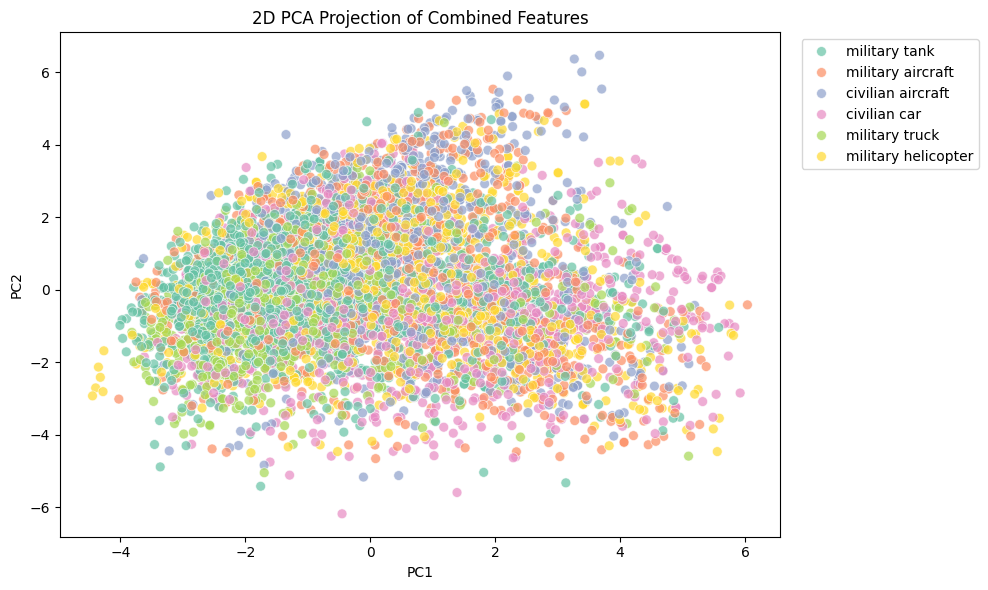

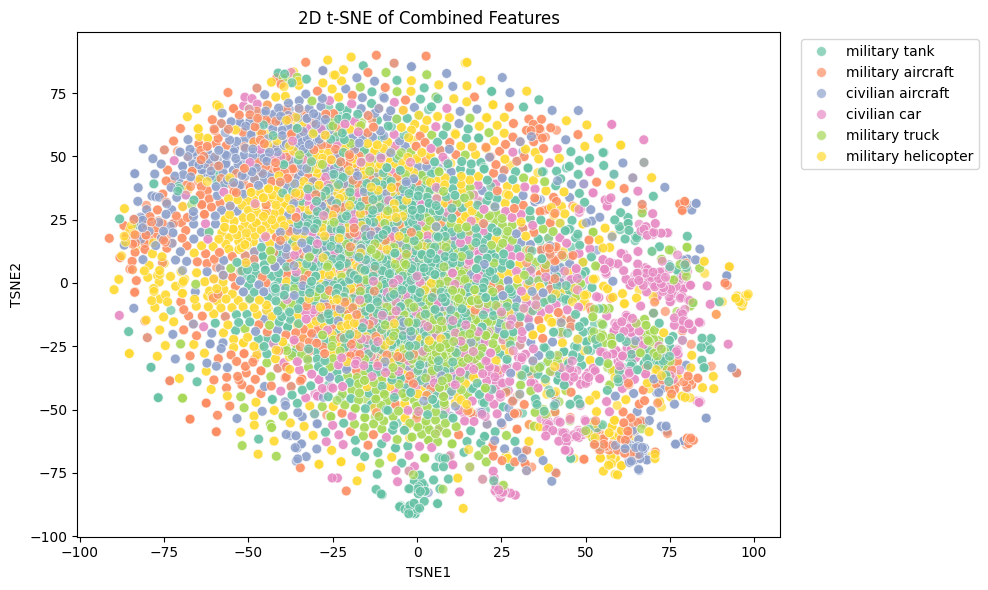


🚀 Training LogisticRegression...
✅ LogisticRegression training complete in 0.35 seconds.

📊 Evaluating LogisticRegression...
⏱️ Inference time: 0.00 seconds
✅ Accuracy: 0.6371

📋 Classification Report:
                     precision    recall  f1-score   support

  civilian aircraft       0.59      0.59      0.59        70
       civilian car       0.59      0.63      0.61        60
  military aircraft       0.63      0.67      0.65        70
military helicopter       0.74      0.61      0.67       108
      military tank       0.58      0.73      0.65       110
     military truck       0.73      0.56      0.64        78

           accuracy                           0.64       496
          macro avg       0.64      0.63      0.63       496
       weighted avg       0.65      0.64      0.64       496



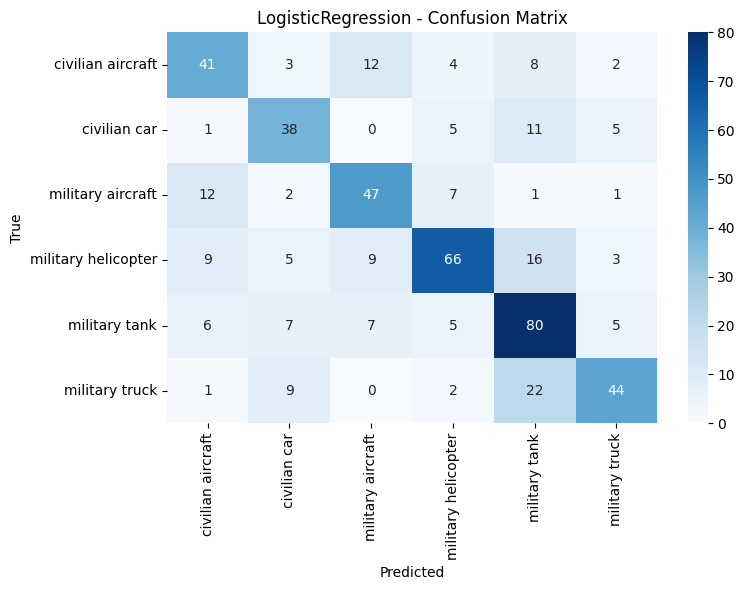

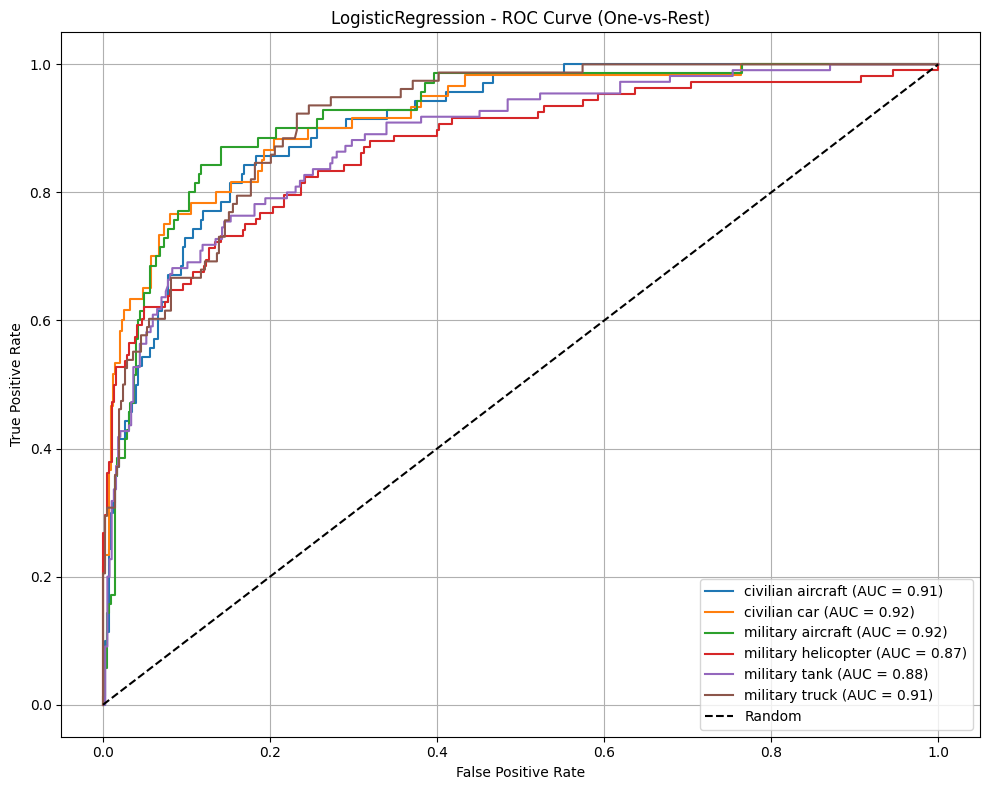

📁 Plots saved in: results/hog_hist/

🚀 Training SVM...
✅ SVM training complete in 39.40 seconds.

📊 Evaluating SVM...
⏱️ Inference time: 0.15 seconds
✅ Accuracy: 0.6673

📋 Classification Report:
                     precision    recall  f1-score   support

  civilian aircraft       0.65      0.66      0.65        70
       civilian car       0.64      0.68      0.66        60
  military aircraft       0.62      0.69      0.65        70
military helicopter       0.78      0.68      0.72       108
      military tank       0.64      0.72      0.68       110
     military truck       0.67      0.56      0.61        78

           accuracy                           0.67       496
          macro avg       0.66      0.66      0.66       496
       weighted avg       0.67      0.67      0.67       496



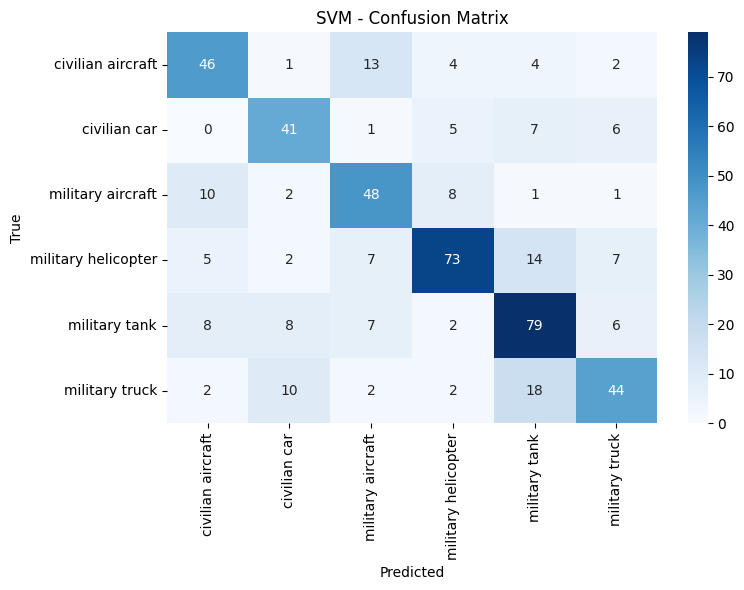

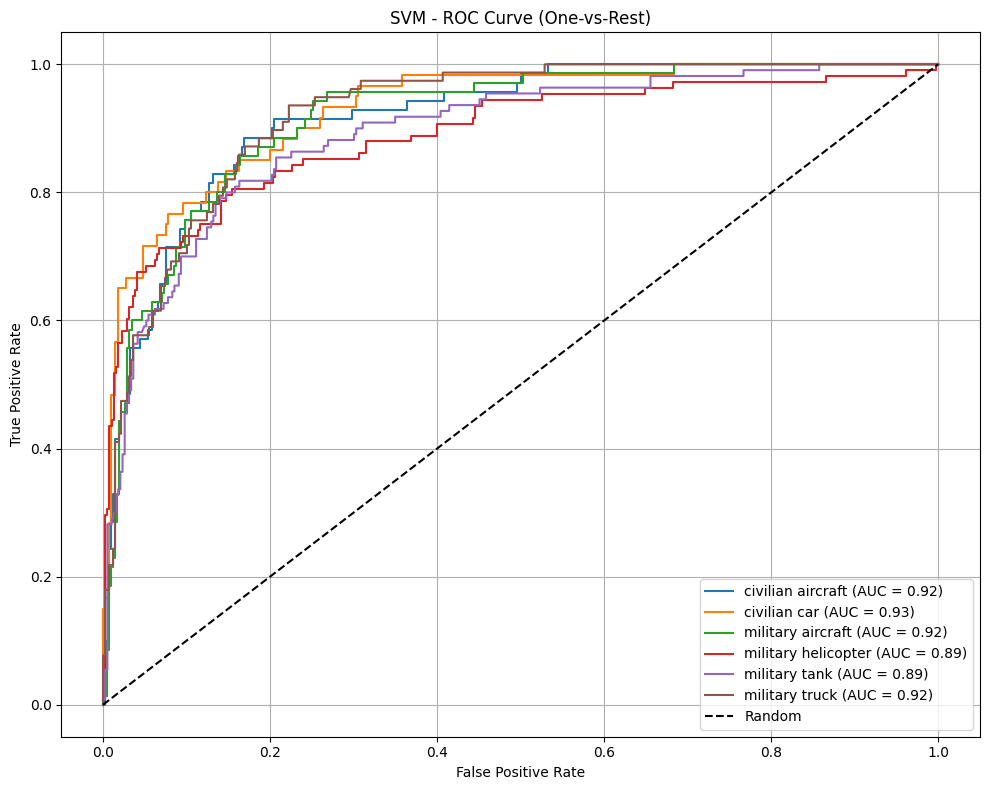

📁 Plots saved in: results/hog_hist/

⏱️ Training & Inference Time Summary:
 - Logistic Regression: 0.35s train, 0.00s infer
 - SVM: 39.40s train, 0.15s infer


In [8]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- Config ---
FEATURE_SET = "hog_hist"
MODEL_OUTPUT_DIR = f"results/{FEATURE_SET}"
os.makedirs(MODEL_OUTPUT_DIR, exist_ok=True)

# --- Load features ---
train = np.load("features_train_rgb.npz", allow_pickle=True)
test = np.load("features_test_rgb.npz", allow_pickle=True)

X_train_raw_hog = train["hog"]
X_train_raw_hist = train["hist"]
X_test_raw_hog = test["hog"]
X_test_raw_hist = test["hist"]
y_train = train["labels"]
y_test = test["labels"]

# --- Encode labels ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
class_names = le.classes_

# --- Apply PCA to HOG ---
pca_hog = PCA(n_components=150)
X_train_hog = pca_hog.fit_transform(X_train_raw_hog)
X_test_hog = pca_hog.transform(X_test_raw_hog)

# --- Apply PCA to HIST ---
n_hist_dims = X_train_raw_hist.shape[1]
pca_hist = PCA(n_components=min(50, n_hist_dims))
X_train_hist = pca_hist.fit_transform(X_train_raw_hist)
X_test_hist = pca_hist.transform(X_test_raw_hist)

# --- Combine Features ---
X_train = np.hstack([X_train_hog, X_train_hist])
X_test = np.hstack([X_test_hog, X_test_hist])
print(f"✅ Combined HOG + HIST: {X_train.shape[1]} features total")

# ============ 2D PCA Visualization ============
pca_2d = PCA(n_components=2)
X_train_pca2d = pca_2d.fit_transform(X_train)

df_pca = pd.DataFrame({
    "PC1": X_train_pca2d[:, 0],
    "PC2": X_train_pca2d[:, 1],
    "Class": le.inverse_transform(y_train_enc)
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Class", palette="Set2", alpha=0.7, s=50)
plt.title("2D PCA Projection of Combined Features")
plt.legend(loc="best", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig(f"{MODEL_OUTPUT_DIR}/pca_2d_visualization.png")
plt.show()

# ============ 2D t-SNE Visualization ============
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

df_tsne = pd.DataFrame({
    "TSNE1": X_train_tsne[:, 0],
    "TSNE2": X_train_tsne[:, 1],
    "Class": le.inverse_transform(y_train_enc)
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x="TSNE1", y="TSNE2", hue="Class", palette="Set2", alpha=0.7, s=50)
plt.title("2D t-SNE of Combined Features")
plt.legend(loc="best", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig(f"{MODEL_OUTPUT_DIR}/tsne_2d_visualization.png")
plt.show()

# ============ Train and Evaluate ============

def train_model(model, model_name):
    print(f"\n🚀 Training {model_name}...")
    start_time = time.time()
    model.fit(X_train, y_train_enc)
    elapsed = time.time() - start_time
    print(f"✅ {model_name} training complete in {elapsed:.2f} seconds.")
    return model, elapsed

def evaluate_model(model, model_name):
    print(f"\n📊 Evaluating {model_name}...")
    start_time = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_time
    print(f"⏱️ Inference time: {inference_time:.2f} seconds")

    y_score = model.predict_proba(X_test)

    acc = accuracy_score(y_test_enc, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print("\n📋 Classification Report:")
    print(classification_report(y_test_enc, y_pred, target_names=class_names))

    cm = confusion_matrix(y_test_enc, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.savefig(f"{MODEL_OUTPUT_DIR}/{model_name}_confusion_matrix.png")
    plt.show()

    y_test_bin = label_binarize(y_test_enc, classes=np.arange(len(class_names)))
    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(len(class_names)):
        plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random")
    plt.title(f"{model_name} - ROC Curve (One-vs-Rest)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{MODEL_OUTPUT_DIR}/{model_name}_roc_curve.png")
    plt.show()

    print(f"📁 Plots saved in: {MODEL_OUTPUT_DIR}/")
    return inference_time

# --- Run Classifiers ---
logreg = LogisticRegression(max_iter=1000)
logreg, logreg_train_time = train_model(logreg, "LogisticRegression")
logreg_infer_time = evaluate_model(logreg, "LogisticRegression")

svm = SVC(kernel="linear", probability=True)
svm, svm_train_time = train_model(svm, "SVM")
svm_infer_time = evaluate_model(svm, "SVM")

print(f"\n⏱️ Training & Inference Time Summary:")
print(f" - Logistic Regression: {logreg_train_time:.2f}s train, {logreg_infer_time:.2f}s infer")
print(f" - SVM: {svm_train_time:.2f}s train, {svm_infer_time:.2f}s infer")



## 4. CNN Embeddings
### 4.1 Extract VGG16 Embeddings for Train/Test

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# --- Config ---
IMAGE_DIR = "Military_and_Civilian_Vehicles_Classification/Images/"
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Load cleaned label files
train_df = pd.read_csv("train_labels_cleaned.csv")
test_df = pd.read_csv("test_labels_cleaned.csv")

# --- Load Pretrained VGG16 and Cut at FC1 ---
base_model = VGG16(weights="imagenet", include_top=True)
model = Model(inputs=base_model.input, outputs=base_model.get_layer("fc1").output)

print("✅ VGG16 model loaded (output from 'fc1' layer)")

# --- Feature Extraction Function ---
def extract_embeddings(df, set_name="train"):
    features = []
    labels = []
    filenames = []

    for i, row in tqdm(df.iterrows(), total=len(df), desc=f"Extracting {set_name} embeddings"):
        path = os.path.join(IMAGE_DIR, row["filename"])
        label = row["class"]

        img = cv2.imread(path)
        if img is None:
            continue
        img = cv2.resize(img, IMAGE_SIZE)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = preprocess_input(img.astype(np.float32))
        img = np.expand_dims(img, axis=0)

        # Extract features
        embedding = model.predict(img, verbose=0)
        features.append(embedding.flatten())
        labels.append(label)
        filenames.append(row["filename"])

    return {
        "cnn": np.array(features),
        "labels": np.array(labels),
        "filenames": np.array(filenames)
    }

# --- Run Extraction ---
train_embeddings = extract_embeddings(train_df, "train")
test_embeddings = extract_embeddings(test_df, "test")

# --- Save for reuse ---
np.savez("features_train_cnn.npz", **train_embeddings)
np.savez("features_test_cnn.npz", **test_embeddings)

print("✅ CNN feature extraction complete and saved.")

2025-04-12 16:03:23.938945: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-12 16:03:23.962716: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744499003.994616 3677661 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744499004.002641 3677661 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744499004.023923 3677661 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
✅ VGG16 model loaded (output from 'fc1' layer)


Extracting test embeddings: 100%|██████████| 496/496 [01:11<00:00,  6.90it/s]


✅ CNN feature extraction complete and saved.


### 4.2. PCA + t-SNE + Classifiers on CNN Features

✅ PCA applied: reduced from 4096 → 50 dimensions.


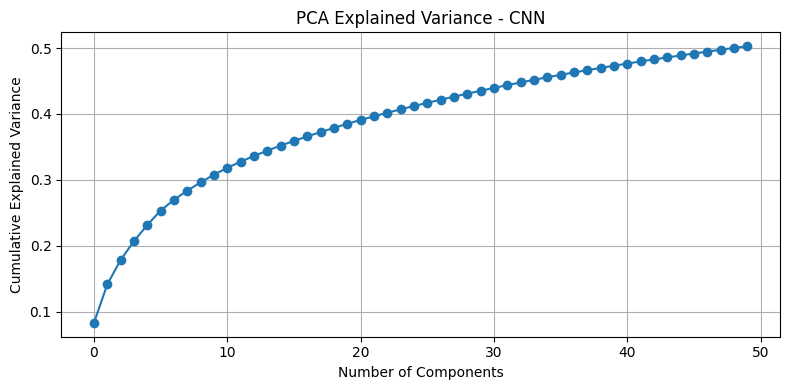

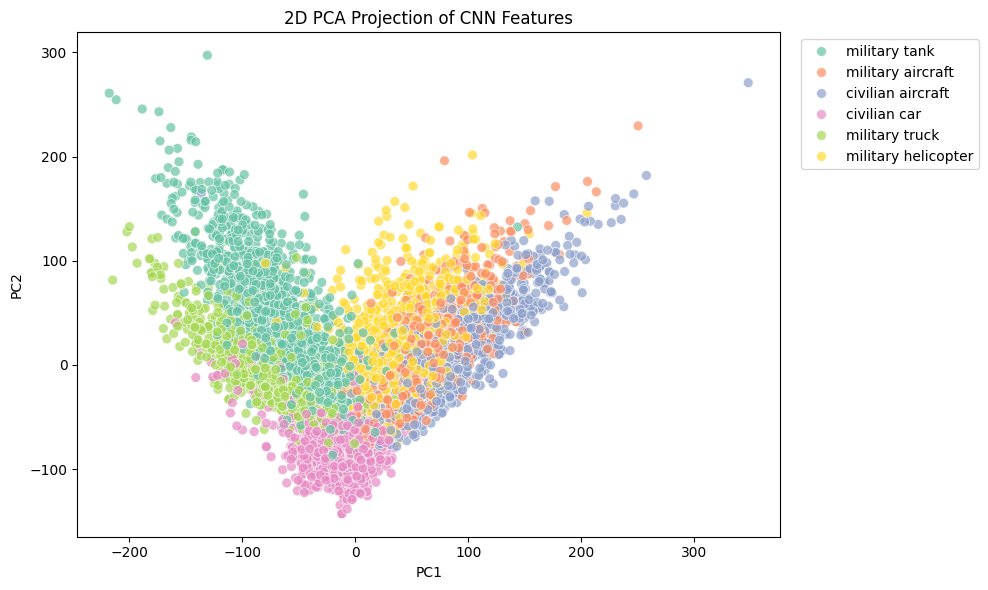

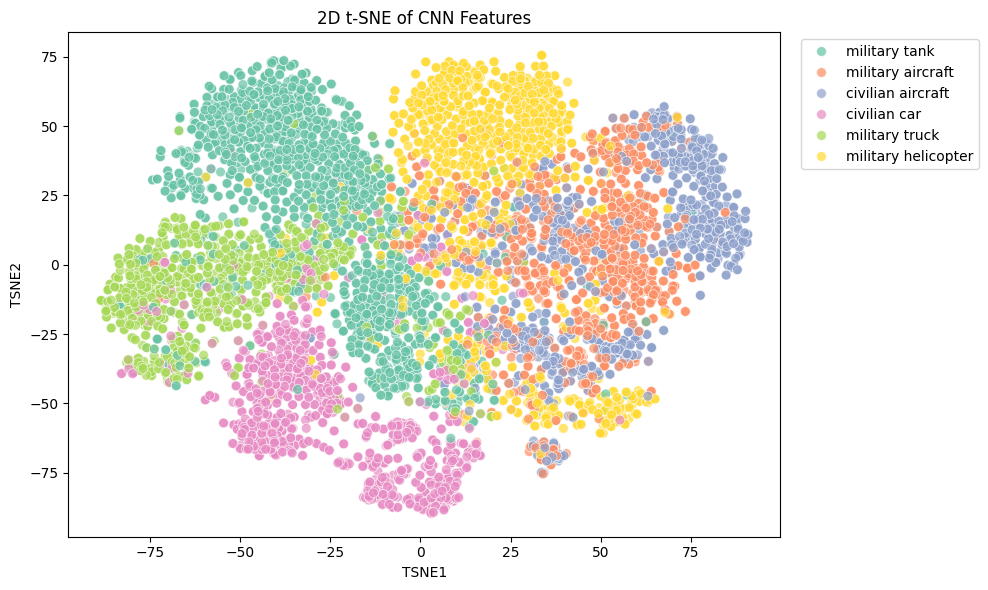


🚀 Training LogisticRegression...
✅ LogisticRegression training complete in 1.05 seconds.

📊 Evaluating LogisticRegression...
⏱️ Inference time: 0.00 seconds
✅ Accuracy: 0.8669

📋 Classification Report:
                     precision    recall  f1-score   support

  civilian aircraft       0.85      0.76      0.80        70
       civilian car       0.89      0.93      0.91        60
  military aircraft       0.75      0.84      0.79        70
military helicopter       0.91      0.87      0.89       108
      military tank       0.89      0.91      0.90       110
     military truck       0.88      0.87      0.88        78

           accuracy                           0.87       496
          macro avg       0.86      0.86      0.86       496
       weighted avg       0.87      0.87      0.87       496



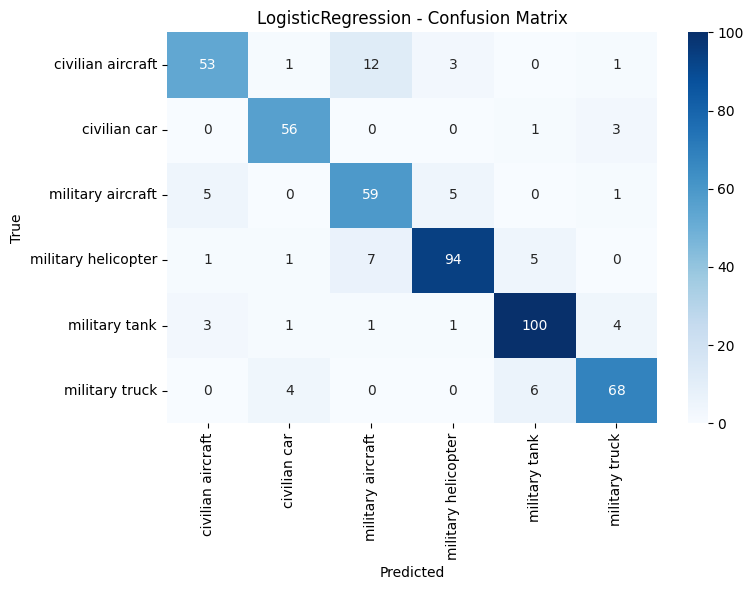

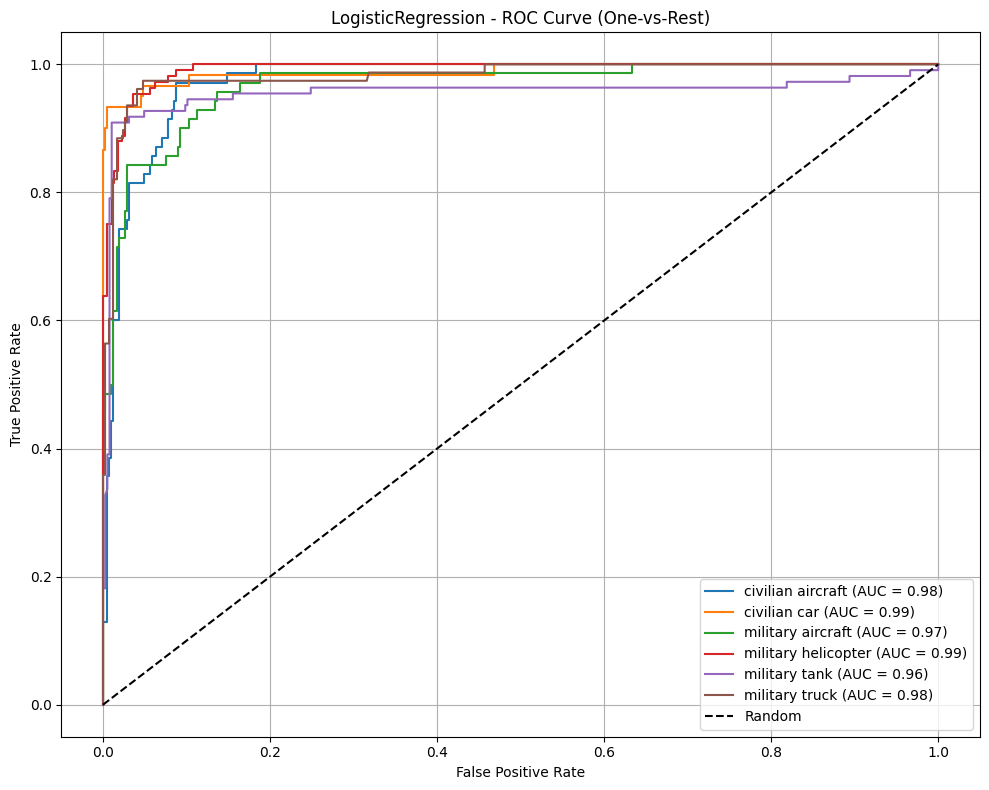

📁 Plots saved in: results/cnn/

🚀 Training SVM...
✅ SVM training complete in 1071.74 seconds.

📊 Evaluating SVM...
⏱️ Inference time: 0.03 seconds
✅ Accuracy: 0.8831

📋 Classification Report:
                     precision    recall  f1-score   support

  civilian aircraft       0.85      0.79      0.81        70
       civilian car       0.92      0.93      0.93        60
  military aircraft       0.78      0.83      0.81        70
military helicopter       0.90      0.92      0.91       108
      military tank       0.94      0.91      0.93       110
     military truck       0.88      0.90      0.89        78

           accuracy                           0.88       496
          macro avg       0.88      0.88      0.88       496
       weighted avg       0.88      0.88      0.88       496



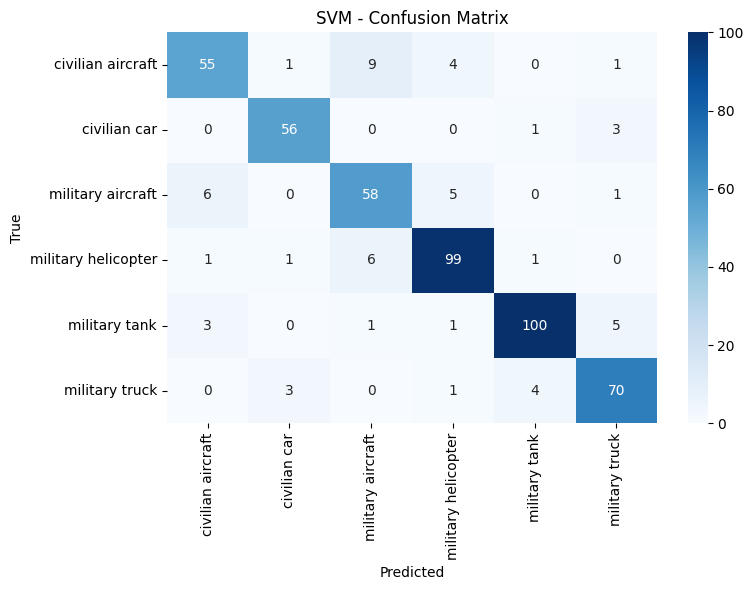

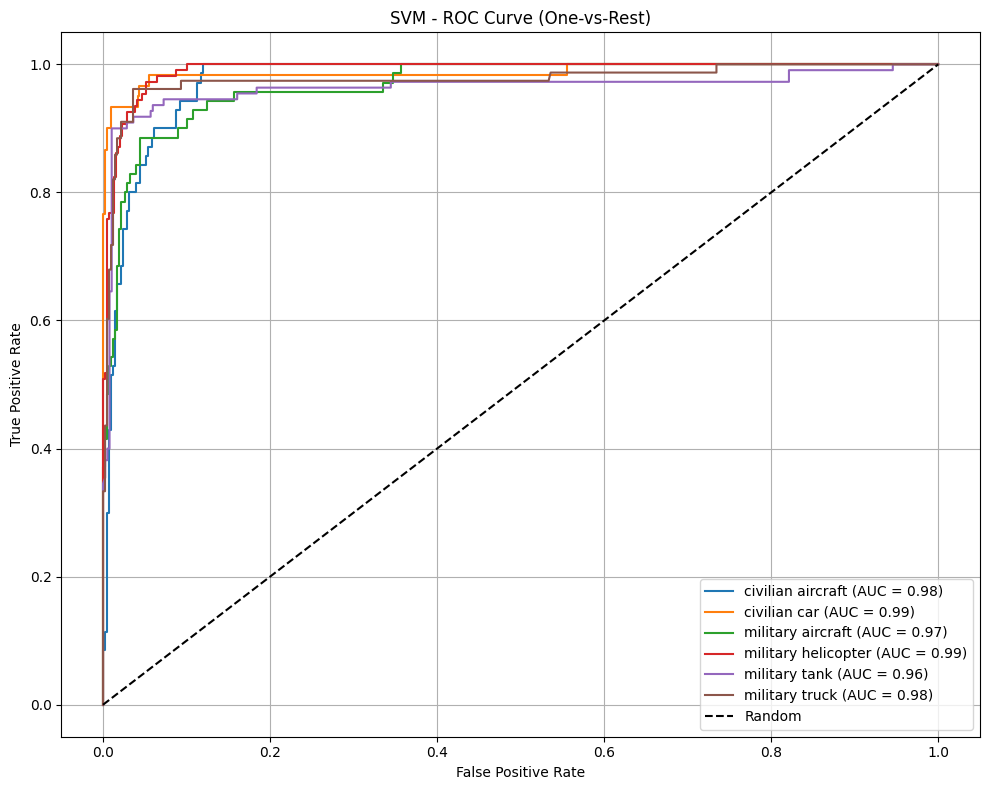

📁 Plots saved in: results/cnn/

⏱️ Training & Inference Time Summary:
 - Logistic Regression: 1.05s train, 0.00s infer
 - SVM: 1071.74s train, 0.03s infer


In [10]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc
)

# --- Config ---
FEATURE_SET = "cnn"
MODEL_OUTPUT_DIR = f"results/{FEATURE_SET}"
os.makedirs(MODEL_OUTPUT_DIR, exist_ok=True)

# --- Load Features ---
train = np.load("features_train_cnn.npz", allow_pickle=True)
test = np.load("features_test_cnn.npz", allow_pickle=True)

X_train_raw = train["cnn"]
X_test_raw = test["cnn"]
y_train = train["labels"]
y_test = test["labels"]

# --- Label Encoding ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
class_names = le.classes_

# --- PCA Reduction ---
n_components = 50
pca_model = PCA(n_components=n_components)
X_train = pca_model.fit_transform(X_train_raw)
X_test = pca_model.transform(X_test_raw)

print(f"✅ PCA applied: reduced from {X_train_raw.shape[1]} → {X_train.shape[1]} dimensions.")

# --- PCA Explained Variance Plot ---
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance - CNN")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{MODEL_OUTPUT_DIR}/pca_explained_variance_curve.png")
plt.show()

# --- 2D PCA Projection ---
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train_raw)

df_pca = pd.DataFrame({
    "PC1": X_train_2d[:, 0],
    "PC2": X_train_2d[:, 1],
    "Class": le.inverse_transform(y_train_enc)
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Class", palette="Set2", alpha=0.7, s=50)
plt.title("2D PCA Projection of CNN Features")
plt.legend(loc="best", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig(f"{MODEL_OUTPUT_DIR}/pca_2d_visualization.png")
plt.show()

# --- 2D t-SNE Projection ---
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

df_tsne = pd.DataFrame({
    "TSNE1": X_train_tsne[:, 0],
    "TSNE2": X_train_tsne[:, 1],
    "Class": le.inverse_transform(y_train_enc)
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x="TSNE1", y="TSNE2", hue="Class", palette="Set2", alpha=0.7, s=50)
plt.title("2D t-SNE of CNN Features")
plt.legend(loc="best", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig(f"{MODEL_OUTPUT_DIR}/tsne_2d_visualization.png")
plt.show()

# --- Training Function ---
def train_model(model, model_name):
    print(f"\n🚀 Training {model_name}...")
    start_time = time.time()
    model.fit(X_train, y_train_enc)
    elapsed = time.time() - start_time
    print(f"✅ {model_name} training complete in {elapsed:.2f} seconds.")
    return model, elapsed

# --- Evaluation Function ---
def evaluate_model(model, model_name):
    print(f"\n📊 Evaluating {model_name}...")
    start_time = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_time
    print(f"⏱️ Inference time: {inference_time:.2f} seconds")

    y_score = model.predict_proba(X_test)

    acc = accuracy_score(y_test_enc, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print("\n📋 Classification Report:")
    print(classification_report(y_test_enc, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test_enc, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.savefig(f"{MODEL_OUTPUT_DIR}/{model_name}_confusion_matrix.png")
    plt.show()

    # ROC Curve
    y_test_bin = label_binarize(y_test_enc, classes=np.arange(len(class_names)))
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(len(class_names)):
        plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random")
    plt.title(f"{model_name} - ROC Curve (One-vs-Rest)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{MODEL_OUTPUT_DIR}/{model_name}_roc_curve.png")
    plt.show()

    print(f"📁 Plots saved in: {MODEL_OUTPUT_DIR}/")
    return inference_time

# --- Run Models ---
logreg = LogisticRegression(max_iter=1000)
logreg, logreg_train_time = train_model(logreg, "LogisticRegression")
logreg_infer_time = evaluate_model(logreg, "LogisticRegression")

svm = SVC(kernel="linear", probability=True)
svm, svm_train_time = train_model(svm, "SVM")
svm_infer_time = evaluate_model(svm, "SVM")

# --- Print Summary ---
print(f"\n⏱️ Training & Inference Time Summary:")
print(f" - Logistic Regression: {logreg_train_time:.2f}s train, {logreg_infer_time:.2f}s infer")
print(f" - SVM: {svm_train_time:.2f}s train, {svm_infer_time:.2f}s infer")


### 4.3. HOG + HIST + CNN Combined Features

✅ Combined feature shape: 250 dimensions


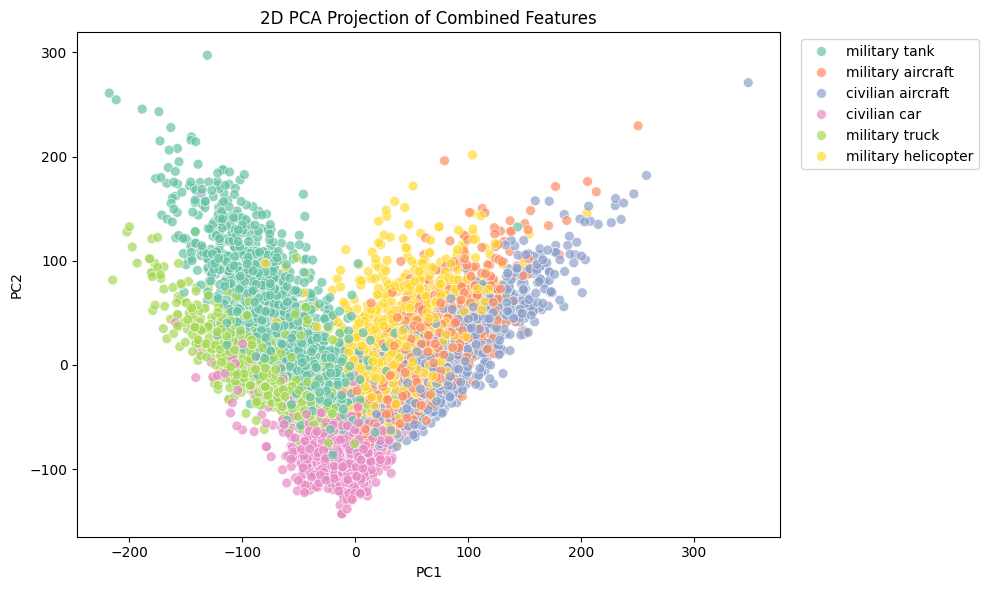

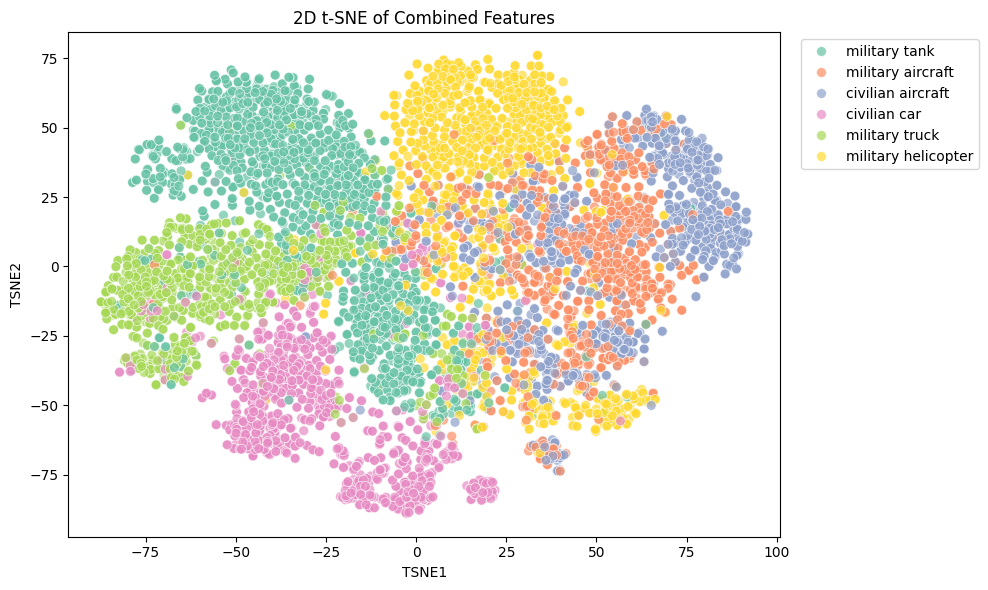


🚀 Training LogisticRegression...


/global/home/users/fengchenliu/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ LogisticRegression training complete in 2.05 seconds.

📊 Evaluating LogisticRegression...
⏱️ Inference time: 0.00 seconds
✅ Accuracy: 0.9173

📋 Classification Report:
                     precision    recall  f1-score   support

  civilian aircraft       0.89      0.83      0.86        70
       civilian car       0.92      0.95      0.93        60
  military aircraft       0.82      0.94      0.88        70
military helicopter       0.99      0.94      0.97       108
      military tank       0.93      0.94      0.93       110
     military truck       0.92      0.88      0.90        78

           accuracy                           0.92       496
          macro avg       0.91      0.91      0.91       496
       weighted avg       0.92      0.92      0.92       496



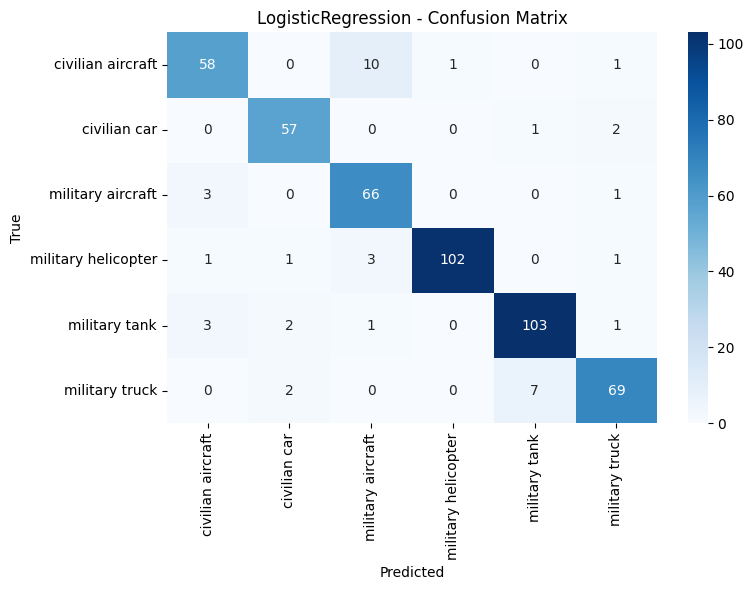

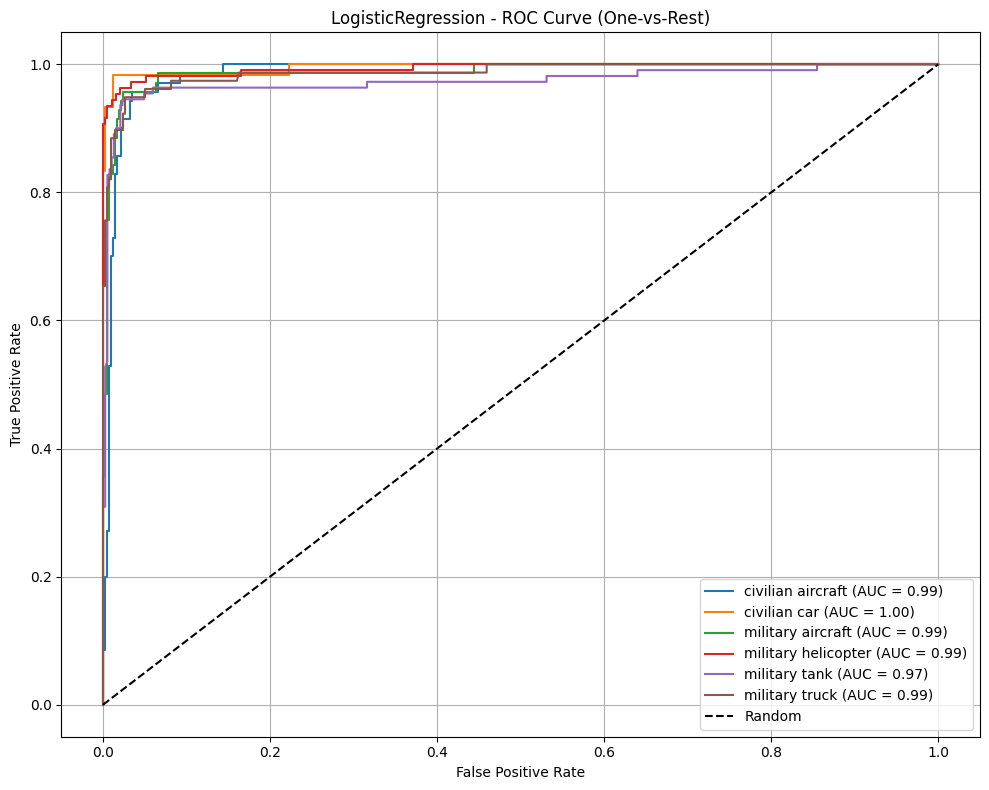

📁 Plots saved in: results/hog_hist_cnn/

🚀 Training SVM...
✅ SVM training complete in 1130.10 seconds.

📊 Evaluating SVM...
⏱️ Inference time: 0.12 seconds
✅ Accuracy: 0.9577

📋 Classification Report:
                     precision    recall  f1-score   support

  civilian aircraft       0.93      0.91      0.92        70
       civilian car       1.00      1.00      1.00        60
  military aircraft       0.91      0.96      0.93        70
military helicopter       0.99      0.98      0.99       108
      military tank       0.93      0.98      0.96       110
     military truck       1.00      0.90      0.95        78

           accuracy                           0.96       496
          macro avg       0.96      0.96      0.96       496
       weighted avg       0.96      0.96      0.96       496



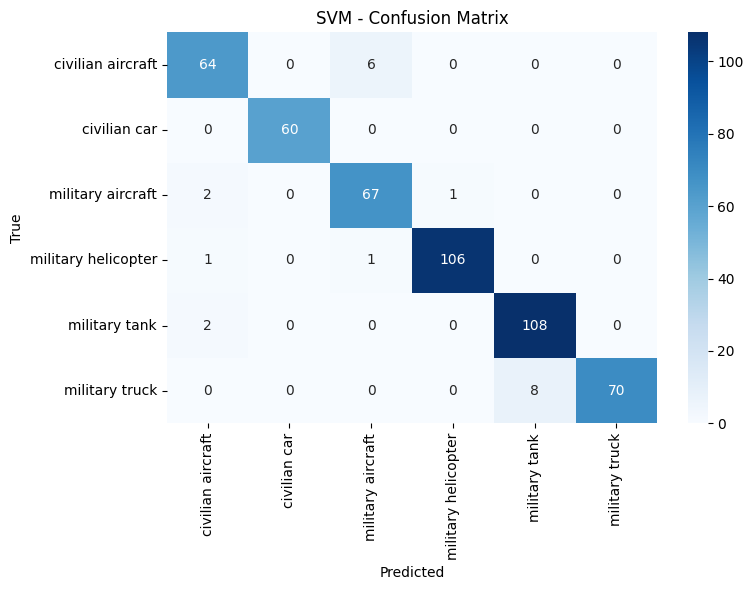

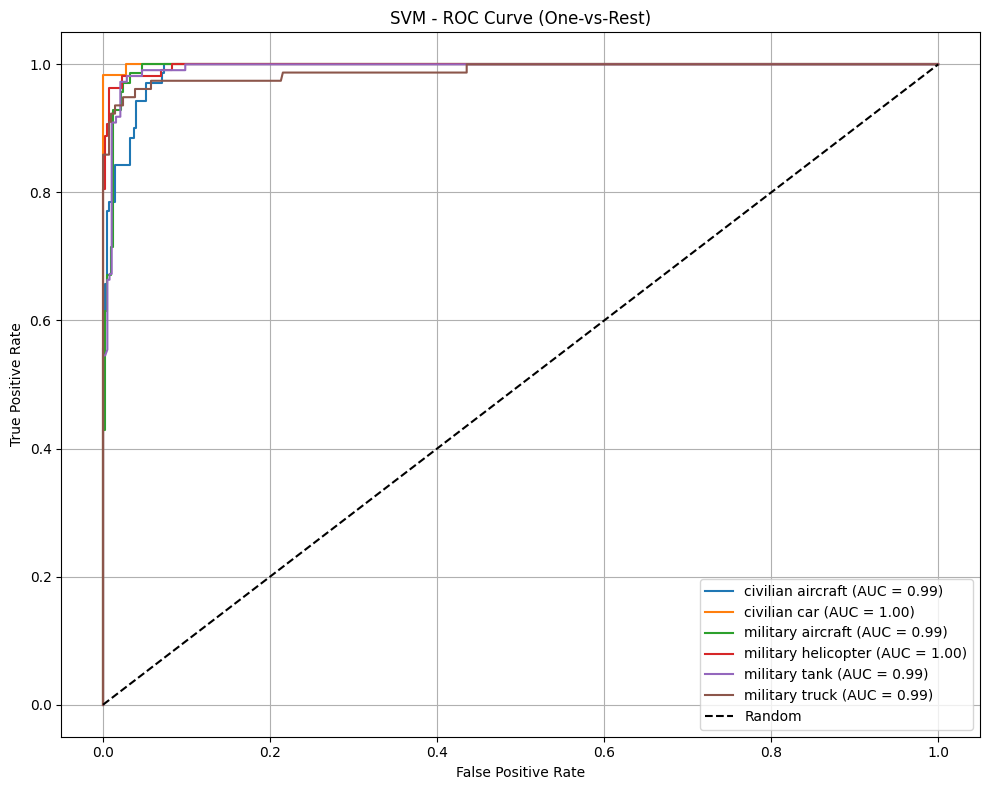

📁 Plots saved in: results/hog_hist_cnn/

⏱️ Training & Inference Time Summary:
 - Logistic Regression: 2.05s train, 0.00s infer
 - SVM: 1130.10s train, 0.12s infer


In [11]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc
)

# --- Config ---
FEATURE_SET = "hog_hist_cnn"
MODEL_OUTPUT_DIR = f"results/{FEATURE_SET}"
os.makedirs(MODEL_OUTPUT_DIR, exist_ok=True)

# --- Load Features ---
train_rgb = np.load("features_train_rgb.npz", allow_pickle=True)
test_rgb = np.load("features_test_rgb.npz", allow_pickle=True)
train_cnn = np.load("features_train_cnn.npz", allow_pickle=True)
test_cnn = np.load("features_test_cnn.npz", allow_pickle=True)

# Extract raw features
X_train_raw_hog = train_rgb["hog"]
X_train_raw_hist = train_rgb["hist"]
X_train_raw_cnn = train_cnn["cnn"]

X_test_raw_hog = test_rgb["hog"]
X_test_raw_hist = test_rgb["hist"]
X_test_raw_cnn = test_cnn["cnn"]

y_train = train_rgb["labels"]
y_test = test_rgb["labels"]

# --- Encode labels ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
class_names = le.classes_

# --- PCA per Feature Set ---
pca_hog = PCA(n_components=150)
X_train_hog = pca_hog.fit_transform(X_train_raw_hog)
X_test_hog = pca_hog.transform(X_test_raw_hog)

pca_hist = PCA(n_components=min(50, X_train_raw_hist.shape[1]))
X_train_hist = pca_hist.fit_transform(X_train_raw_hist)
X_test_hist = pca_hist.transform(X_test_raw_hist)

pca_cnn = PCA(n_components=50)
X_train_cnn = pca_cnn.fit_transform(X_train_raw_cnn)
X_test_cnn = pca_cnn.transform(X_test_raw_cnn)

# --- Combine All Features ---
X_train = np.hstack([X_train_hog, X_train_hist, X_train_cnn])
X_test = np.hstack([X_test_hog, X_test_hist, X_test_cnn])

print(f"✅ Combined feature shape: {X_train.shape[1]} dimensions")

# ============ 2D PCA ============
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train)

df_pca = pd.DataFrame({
    "PC1": X_train_2d[:, 0],
    "PC2": X_train_2d[:, 1],
    "Class": le.inverse_transform(y_train_enc)
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Class", palette="Set2", alpha=0.7, s=50)
plt.title("2D PCA Projection of Combined Features")
plt.legend(loc="best", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig(f"{MODEL_OUTPUT_DIR}/pca_2d_visualization.png")
plt.show()

# ============ 2D t-SNE ============
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

df_tsne = pd.DataFrame({
    "TSNE1": X_train_tsne[:, 0],
    "TSNE2": X_train_tsne[:, 1],
    "Class": le.inverse_transform(y_train_enc)
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x="TSNE1", y="TSNE2", hue="Class", palette="Set2", alpha=0.7, s=50)
plt.title("2D t-SNE of Combined Features")
plt.legend(loc="best", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig(f"{MODEL_OUTPUT_DIR}/tsne_2d_visualization.png")
plt.show()

# ============ Train and Evaluate ============
def train_model(model, model_name):
    print(f"\n🚀 Training {model_name}...")
    start_time = time.time()
    model.fit(X_train, y_train_enc)
    elapsed = time.time() - start_time
    print(f"✅ {model_name} training complete in {elapsed:.2f} seconds.")
    return model, elapsed

def evaluate_model(model, model_name):
    print(f"\n📊 Evaluating {model_name}...")
    start_time = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_time
    print(f"⏱️ Inference time: {inference_time:.2f} seconds")

    y_score = model.predict_proba(X_test)

    acc = accuracy_score(y_test_enc, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print("\n📋 Classification Report:")
    print(classification_report(y_test_enc, y_pred, target_names=class_names))

    cm = confusion_matrix(y_test_enc, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.savefig(f"{MODEL_OUTPUT_DIR}/{model_name}_confusion_matrix.png")
    plt.show()

    y_test_bin = label_binarize(y_test_enc, classes=np.arange(len(class_names)))
    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(len(class_names)):
        plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random")
    plt.title(f"{model_name} - ROC Curve (One-vs-Rest)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{MODEL_OUTPUT_DIR}/{model_name}_roc_curve.png")
    plt.show()

    print(f"📁 Plots saved in: {MODEL_OUTPUT_DIR}/")
    return inference_time

# --- Run Classifiers ---
logreg = LogisticRegression(max_iter=1000)
logreg, logreg_train_time = train_model(logreg, "LogisticRegression")
logreg_infer_time = evaluate_model(logreg, "LogisticRegression")

svm = SVC(kernel="linear", probability=True)
svm, svm_train_time = train_model(svm, "SVM")
svm_infer_time = evaluate_model(svm, "SVM")

# --- Summary ---
print(f"\n⏱️ Training & Inference Time Summary:")
print(f" - Logistic Regression: {logreg_train_time:.2f}s train, {logreg_infer_time:.2f}s infer")
print(f" - SVM: {svm_train_time:.2f}s train, {svm_infer_time:.2f}s infer")
